### Initial Setup

Import the necessary packages.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set the path to where the munged data is located.

In [2]:
path_to_data = './Data' 
os.chdir(path_to_data)

Read in the data.

In [3]:
df = pd.read_csv('./munged_df.csv', index_col='account_id')
# df = pd.read_csv('./vif_pruned_df.csv', index_col='account_id')
len(df)

16607

Extract the features and labels.

In [4]:
# Extract feature columns
feature_cols = list(df.columns[:-1])

# Extract target column 'passed'
target_col = df.columns[-1] 

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]
y_all = df[target_col] 

Scale the features

In [5]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_all = scaler.fit_transform(X_all)

Split the data into training and testing sets.

In [6]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all , 
                                                    y_all, 
                                                    stratify=y_all,
                                                    test_size=0.1, 
                                                    random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 14946 samples.
Testing set has 1661 samples.


### Implementating PCA

Apply PCA to the training data.

In [7]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 4)
# pca = pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_train = pd.DataFrame(X_train, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
# print(pca.explained_variance_ratio_) 

In [8]:
# pca = pca.fit(X_test)
# X_test = pca.transform(X_test)
# X_test = pd.DataFrame(X_test, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
# print(pca.explained_variance_ratio_) 

### Creating the Classifier

Create the SVM classifier with a RBF kernel.

In [9]:
from sklearn.svm import SVC
clf = SVC()

In [17]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [11]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

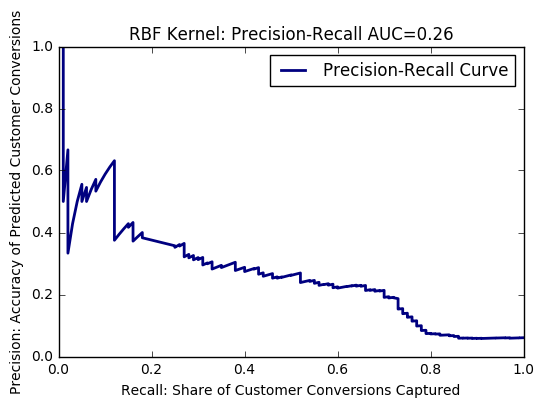

In [12]:
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('RBF Kernel: Precision-Recall AUC={0:0.2f}'.format(average_precision))
# plt.show()
path = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
       'Capstone_Project/Images'
savepath = os.path.join(path, 'non-optimized_rbf_kernel.png')
plt.savefig(savepath)
plt.clf()

In [13]:
from sklearn import svm
clf = svm.LinearSVC()

In [14]:
from sklearn.metrics import precision_recall_curve
y_score = clf.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

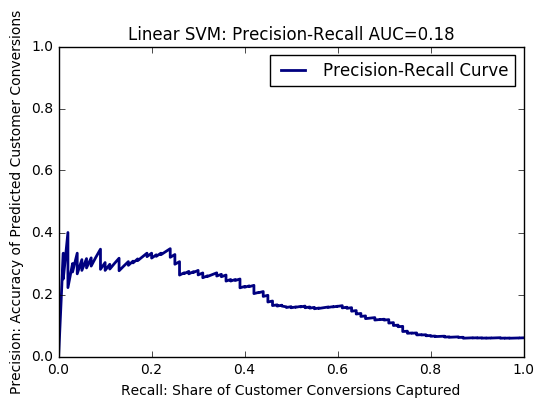

In [16]:
lw = 2
plt.plot(recall, precision, lw=lw, color='navy',
         label='Precision-Recall Curve')
plt.legend(loc="upper right")
plt.xlabel('Recall: Share of Customer Conversions Captured')
plt.ylabel('Precision: Accuracy of Predicted Customer Conversions')
plt.title('Linear SVM: Precision-Recall AUC={0:0.2f}'.format(average_precision))
# plt.show()
path = '/home/bsknight/Documents/Personal_Training_Git/Udacity/Udacity-Machine_Learning_Nanodegree/' + \
        'Capstone_Project/Images'
savepath = os.path.join(path, 'non-optimized_linear_svm.png')
plt.savefig(savepath)
plt.clf()